Zuveir Jameer

23 December 2022

Imperial College Business Analytics

Part 1: What makes a song popular?

Business Understanding

We all have our favorite songs. They lighten the mood, cheer us up or set the mood for the perfect party or date. 
 
Every music label wants the next hit song, which will be on everyone's playlist and lips. It will also set the cash register ringing. 
 
So far, identifying the next best song has been a prerogative of a few people. But the new music streaming companies want to change that. They want people to use their services as much as possible, and having songs that people will like will help. 
 
To achieve this in a data-driven manner, they started breaking down a song into numbers, identifying features like acoustics and danceability of each song. Also, they started measuring a song's popularity using a number scale. 
 
Business Objectives

You are a data analyst and are tasked to identify the features that make a song popular. What genre, which artists impact popularity? What is most important for a song to be popular? Is it liveness, loudness, tempo, or speechiness?
Can you deep dive into the data with numerical and graphical summaries to illustrate what makes a song popular and help the company identify the features they should focus on? Any additional interesting insights you can come up with would also be helpful.

Data download: 
https://drive.google.com/file/d/1TelyB-yXmvsyqUa1byONUA_kc3HentWk/view?usp=sharing

Data understanding

Song Features

artists: Name of artists
id: Unique song ID
name: Name of the song
popularity: The popularity score of the song. This is a value between 0-100.
release_date: When the song was released
year: release year
Audio Features
In addition to the above features the Spotify API allows to access features that Spotify generates for each feature:
acousticness: confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
danceability : describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
duration_ms: duration of track in milliseconds
energy : measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
instrumentalness : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.
explicit: Whether the song is explicit or not
key : The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
liveness : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
loudness : The overall loudness of a track in decibels (dB). Values typical range between -60 and ~4db.
mode : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
speechiness : Speechiness detects the presence of spoken words in a track.
tempo : The overall estimated tempo of a track in beats per minute (BPM)
valence : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
Source: Count.co


Questions answered
https://notebooksharing.space/view/add23f4c61904570b285ccb5fed6a12f8b512119dbc15cefc47098ecaad82b31#displayOptions=


In [151]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
plt.style.use('fivethirtyeight')


# import os 
# os.getcwd() # make sure the zip file is saved in the working directory



df = pd.read_csv("D:\\Private\\Imperial Business Analytics\\Week 7\\spotify_data\\spotify_data.csv", parse_dates= ['release_date', 'year'])

In [152]:
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

#### Preamble

In [153]:
df.shape

(169909, 19)

#### Sampling

Take a sample of 40% from the original dataframe and save to an external file (csv)

In [154]:
df.sample(int(.4*len(df))).to_csv("test_data.csv", index=False) #Export a sample to a new file in the working directory

create a new sample dataframe with 40% of the original dataframe

In [155]:
sample_df=df.sample(int(.4*len(df)))

In [156]:
len(sample_df)

67963

Average duration of a song is 3.98 minutes

In [157]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
explicit,169909.0,0.084863,0.278679,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
mode,169909.0,0.708556,0.454429,0.0,0.0000,1.000000,1.0000,1.000


There are 27,622 artists, 132,940 releases

In [158]:
df.describe(include='O')

,artists,id,name
count,169909,169909,169909
unique,33375,169909,132940
top,['Эрнест Хемингуэй'],6KbQ3uYMLKb5jDxLF7wYDD,Summertime
freq,1215,1,62


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acousticness      169909 non-null  float64       
 1   artists           169909 non-null  object        
 2   danceability      169909 non-null  float64       
 3   duration_ms       169909 non-null  int64         
 4   energy            169909 non-null  float64       
 5   explicit          169909 non-null  int64         
 6   id                169909 non-null  object        
 7   instrumentalness  169909 non-null  float64       
 8   key               169909 non-null  int64         
 9   liveness          169909 non-null  float64       
 10  loudness          169909 non-null  float64       
 11  mode              169909 non-null  int64         
 12  name              169909 non-null  object        
 13  popularity        169909 non-null  int64         
 14  rele

In [160]:
df.dtypes #Show only the type

acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                          object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                        object
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                datetime64[ns]
dtype: object

#### Check for null values

Dataframe does not have nulls checking using 2 different methods

In [161]:
pd.isnull(df).sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [162]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

#### Check for duplicates

Dataframe does not have duplicate rows

In [163]:
df.duplicated().sum()

0

#### Sorting

8 least popular songs

In [164]:
df.sort_values('popularity', ascending=True).head(8)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928-01-01,0.0506,118.469,0.7790,1928-01-01
25146,0.950,['Tasia Verra'],0.292,282400,0.211,0,1KUYDXe9MEHRgRa6FE36ZF,0.036000,10,0.3350,-12.834,1,Apo tin Patra kinisa,0,1950-01-01,0.0376,101.268,0.2970,1950-01-01
25145,0.850,['Tasia Verra'],0.490,253760,0.487,0,1KTJ6WlIsapdoJI9sj6TSE,0.000001,2,0.3420,-10.495,0,Marainomai o kaimenos,0,1950-01-01,0.0338,97.321,0.8590,1950-01-01
25144,0.987,['Raavu Balasaraswathi'],0.367,133947,0.301,0,1KT6LIYzR0bIhiEJ9Yf8ff,0.041000,5,0.0899,-7.921,1,Deepaval - Pathos,0,1950-12-01,0.0569,88.436,0.3650,1950-01-01
25143,0.683,['Эрнест Хемингуэй'],0.739,100100,0.323,1,1KS2C7pgSLI5rL2br6dO25,0.000000,1,0.1630,-18.350,1,"Часть 73.3 - За рекой, в тени деревьев",0,1950-01-01,0.8870,87.359,0.4640,1950-01-01
25142,0.720,"['Leonard Bernstein', 'Columbia Symphony Orche...",0.387,179333,0.123,0,1KH7sfIS5R318bN2LsHVsN,0.901000,5,0.2420,-20.792,1,Fancy Free - Ballet: III. Enter Two Girls,0,1950-01-01,0.0333,92.243,0.0738,1950-01-01
25141,0.941,['Lord Melody'],0.599,226482,0.377,0,1KDZthoYCm6bHSGzvDi8XX,0.000560,7,0.2840,-15.136,1,Wait for Me,0,1950-01-01,0.0530,105.450,0.9040,1950-01-01
25140,0.995,['Sandhya Mukherjee'],0.495,199227,0.427,0,1JypbDf7pdQndsb53wBwoM,0.888000,3,0.1090,-9.611,1,Taba Moner Madhu Bone,0,1950-12-31,0.0652,68.859,0.6510,1950-01-01


8 Most popular songs

In [165]:
df.sort_values(by=['popularity', 'artists'], ascending=False).head(8)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020-01-01
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020-01-01
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020-01-01
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020-01-01
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019-01-01
87840,0.10400,['Roddy Ricch'],0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019-01-01
87946,0.32100,['Drake'],0.834,247059,0.454,1,127QTOFJsJQp5LbJbu3A1y,0.000006,1,0.1140,-9.750,0,Toosie Slide,95,2020-04-03,0.2010,81.618,0.837,2020-01-01
87844,0.30500,"['BENEE', 'Gus Dapperton']",0.863,223480,0.631,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019-01-01


A more long winded way to to create the sort of most popular. inplace is to false because we do not want to sort the current dataframe

In [166]:
most_pop_df = df.query('popularity > 90', inplace=False).sort_values(by=['popularity','artists'], ascending=False)
most_pop_df[:8] #Top 8 rows similar to most_pop_df.head(8)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020-01-01
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020-01-01
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020-01-01
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020-01-01
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019-01-01
87840,0.10400,['Roddy Ricch'],0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019-01-01
87946,0.32100,['Drake'],0.834,247059,0.454,1,127QTOFJsJQp5LbJbu3A1y,0.000006,1,0.1140,-9.750,0,Toosie Slide,95,2020-04-03,0.2010,81.618,0.837,2020-01-01
87844,0.30500,"['BENEE', 'Gus Dapperton']",0.863,223480,0.631,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019-01-01


#### Convert duration from milliseconds to seconds

In [167]:
df=df.sort_values(by='duration_ms')

In [168]:
df.insert(4,'duration_mins', df['duration_ms']/60000)

In [169]:
df.describe().transpose() #Easier to read the table

,count,mean,std,min,25%,50%,75%,max
acousticness,169909.0,0.493214,0.376627,0.000000,0.094500,0.492000,0.888000,9.960000e-01
danceability,169909.0,0.538150,0.175346,0.000000,0.417000,0.548000,0.667000,9.880000e-01
duration_ms,169909.0,231406.158973,121321.923219,5108.000000,171040.000000,208600.000000,262960.000000,5.403500e+06
duration_mins,169909.0,3.856769,2.022032,0.085133,2.850667,3.476667,4.382667,9.005833e+01
energy,169909.0,0.488593,0.267390,0.000000,0.263000,0.481000,0.710000,1.000000e+00
explicit,169909.0,0.084863,0.278679,0.000000,0.000000,0.000000,0.000000,1.000000e+00
instrumentalness,169909.0,0.161937,0.309329,0.000000,0.000000,0.000204,0.086800,1.000000e+00
key,169909.0,5.200519,3.515257,0.000000,2.000000,5.000000,8.000000,1.100000e+01
liveness,169909.0,0.206690,0.176796,0.000000,0.098400,0.135000,0.263000,1.000000e+00
loudness,169909.0,-11.370289,5.666765,-60.000000,-14.470000,-10.474000,-7.118000,3.855000e+00


#### Songs Analysis

In [170]:
df.count()

acousticness        169909
artists             169909
danceability        169909
duration_ms         169909
duration_mins       169909
energy              169909
explicit            169909
id                  169909
instrumentalness    169909
key                 169909
liveness            169909
loudness            169909
mode                169909
name                169909
popularity          169909
release_date        169909
speechiness         169909
tempo               169909
valence             169909
year                169909
dtype: int64

There are 92,516 tracks that are duplicates by name. Before exploding there were 36,969 tracks that were duplicates by name

In [171]:
df[df['name'].duplicated()].shape

(36969, 20)

This will return the track names with duplicates not counted. The number of tracks with unique names is 132,940

In [172]:
df.groupby('name')['name'].unique().count()

132940

The top 10 most frequent song duration

In [173]:
df['duration_mins'].value_counts().nlargest(10)

3.200000    55
3.000000    53
4.000000    50
3.100000    50
3.066667    49
2.666667    47
2.800000    46
2.816667    45
2.916667    44
2.833333    44
Name: duration_mins, dtype: int64

The 10 longest duration songs

In [174]:
df['duration_mins'].sort_values(ascending=False).head(10)

7411      90.058333
46972     71.167233
54511     71.156783
125152    68.670967
54675     68.670967
38491     63.606217
140784    60.846667
72889     59.299250
10573     59.185867
118777    58.726983
Name: duration_mins, dtype: float64

In [175]:
df.sort_values(by='duration_mins', ascending=False)[['artists', 'name', 'duration_mins']].head(10)

,artists,name,duration_mins
7411,['Sound Dreamer'],Brown Noise - 90 Minutes,90.058333
46972,['Sounds for Life'],Brown Noise for Sleep,71.167233
54511,"['Lightning, Thunder and Rain Storm']",Midnight Thunderstorm Part 2,71.156783
125152,['Ocean Waves For Sleep'],Ocean Waves for Sleep,68.670967
54675,['Ocean Sounds'],Ocean Waves Sounds,68.670967
38491,['Sleep'],Dopesmoker,63.606217
140784,['Brian Eno'],Thursday Afternoon - 2005 Digital Remaster,60.846667
72889,['Environments'],The Psychologically Ultimate Seashore (16 rpm),59.299250
10573,['Umm Kulthum'],Enta Oumry,59.185867
118777,['Umm Kulthum'],Naheg El Berda,58.726983


Most popular songs before 1998

In [176]:
df[df['release_date'] < '1998'].sort_values(by='popularity', ascending=False)[['name','artists','popularity','release_date']].head(10)

,name,artists,popularity,release_date
84441,Take on Me,['a-ha'],83,1985-06-01
83840,Highway to Hell,['AC/DC'],83,1979-07-27
84540,Livin' On A Prayer,['Bon Jovi'],83,1986-08-16
84241,Every Breath You Take,['The Police'],83,1983-06-17
84140,Africa,['TOTO'],83,1982-04-08
82840,Here Comes The Sun - Remastered 2009,['The Beatles'],83,1969-09-26
83940,Back In Black,['AC/DC'],82,1980-07-25
83340,Sweet Home Alabama,['Lynyrd Skynyrd'],82,1974-04-15
83540,Hotel California - 2013 Remaster,['Eagles'],82,1976-12-08
85240,Creep,['Radiohead'],82,1993-02-22


Density function for Duration in Minutes

<AxesSubplot: ylabel='Density'>

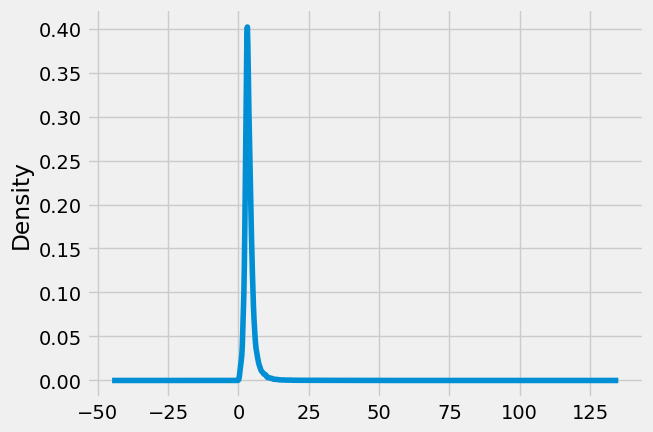

In [177]:
df['duration_mins'].plot.density()

#### Indexing

Change Index

In [178]:
df.set_index('release_date',inplace=True)

#### Working on Artist Names and seeking information on Artists

A sample of 20 shows that the artist names are in an array if there are more than one artist.

In [179]:
df['artists'].sample(20)

release_date
1929-01-01                                ['Эрих Мария Ремарк']
1991-01-01                                      ['Tina Turner']
1928-09-16                       ['Francisco Canaro', 'Charlo']
1982-04-21                                              ['羅大佑']
1937-01-01                                    ['Raymond Scott']
1987-01-01                                  ['John Mellencamp']
2016-09-01    ['Revol', 'Ozuna', 'Cosculluela', 'Arcangel', ...
1932-01-01                                ['Maurice Chevalier']
2007-01-01                                       ['Levon Helm']
2004-04-05                                     ['Modest Mouse']
1964-01-01                                      ['Donald Byrd']
2006-10-02                                  ['Grupo Laberinto']
1958-01-01                                    ['Nat King Cole']
1979-01-01    ['Mandy Patinkin', 'Patti LuPone', 'Bob Gunton...
2014-10-14                                     ['Mary Lambert']
1961-01-01    ['Camille Sai

Create a copy of the dataframe to get accurate details of the artist.

Note, a new dataframe is being calculated as the explode will create so many new entries that the other features will increase and skew the results of out exploration

In [180]:
art_df = df.copy() #A deep copy
art_df['artists'] = art_df['artists'].apply(literal_eval) #Convert the string column to a list column. Otherwise the explode will not work
art_df = art_df.explode('artists')

Check for duplicates

In [181]:
art_df.duplicated().sum()

0

In [182]:
art_df['artists'].sample(20)

release_date
1950-01-01              Ioanna Georgakopoulou
1954-01-01                      Dario Caselli
1983-01-01                John Eliot Gardiner
2014-07-22                      Ty Dolla $ign
1948-01-01                       Robert Craft
1946-12-31                         Noor Jehan
1983-01-01                       Robert Plant
2020-02-14                        Tame Impala
1966-03-01              The Mamas & The Papas
1966-01-01                    Johnny Hallyday
1989-01-01                  Loreena McKennitt
1972-01-03                  Milton Nascimento
1949-01-01                      Henry Purcell
1975-01-01                             Amanaz
1953-01-01              Stellakis Perpiniadis
1929-10-18                             Charlo
1977-08-29                           Iggy Pop
1962-03-01                      Frank Sinatra
1921-01-01                Sergei Rachmaninoff
1926-01-01    Louis Armstrong & His Hot Seven
Name: artists, dtype: object

Replace artists name that include the character $ with the character S

In [183]:
art_df['artists']=art_df['artists'].str.replace('$','S')
# Joey Bada$$

C:\Users\uzx2\AppData\Local\Temp\ipykernel_4400\576079825.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  art_df['artists']=art_df['artists'].str.replace('$','S')


The 20 artists that have with the highest number of releases.

In [184]:
art_df['artists'].value_counts().nlargest(20)

Francisco Canaro           2234
Эрнест Хемингуэй           1215
Frédéric Chopin            1035
Ludwig van Beethoven        976
Wolfgang Amadeus Mozart     938
Johann Sebastian Bach       868
Эрих Мария Ремарк           781
Igor Stravinsky             739
Frank Sinatra               732
Giuseppe Verdi              691
Billie Holiday              685
Arturo Toscanini            632
Ignacio Corsini             620
Vladimir Horowitz           614
Johnny Cash                 588
New York Philharmonic       582
Bob Dylan                   553
The Rolling Stones          522
The Beach Boys              503
Lata Mangeshkar             502
Name: artists, dtype: int64

<AxesSubplot: >

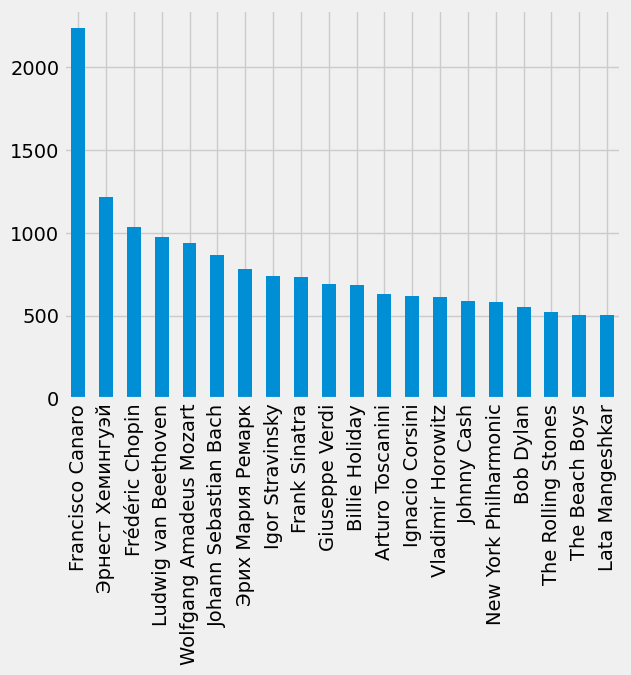

In [185]:
art_df['artists'].value_counts().nlargest(20).plot(kind='bar')

The 10 artists that have with the smallest number of releases.

In [186]:
art_df['artists'].value_counts().nsmallest(10)

Ephraim Galloway    1
Sneaky              1
Ghetto Mafia        1
Red Rockers         1
Rye Rye             1
Archive             1
Papa Juggy          1
Green Jelly         1
Bo Roc              1
Wayne Marshall      1
Name: artists, dtype: int64

There are 27,622 artists. The max number of releases and artist has made is 2234. The mean song release is 8. 

In [187]:
art_df['artists'].value_counts().describe()

count    27622.00000
mean         8.16219
std         32.47829
min          1.00000
25%          1.00000
50%          2.00000
75%          5.00000
max       2234.00000
Name: artists, dtype: float64

#### Correletaion and Graphs

In [188]:
df.corr()

C:\Users\uzx2\AppData\Local\Temp\ipykernel_4400\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,acousticness,danceability,duration_ms,duration_mins,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
acousticness,1.000000,-0.265950,-0.079311,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540
danceability,-0.265950,1.000000,-0.134500,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242
duration_ms,-0.079311,-0.134500,1.000000,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760
duration_mins,-0.079311,-0.134500,1.000000,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760
energy,-0.750283,0.220569,0.036396,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086
explicit,-0.253690,0.241891,-0.043811,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327
instrumentalness,0.335821,-0.281429,0.084814,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929
key,-0.021686,0.022599,-0.003116,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064
liveness,-0.023871,-0.105532,0.034270,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426
loudness,-0.567072,0.294170,-0.014687,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418


In [189]:
#sns.pairplot(df)

Dropping a few columns that are zero on both axes of the table.

Then displaying the correletion in the heatmap

C:\Users\uzx2\AppData\Local\Temp\ipykernel_4400\499331600.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (sns.heatmap(df.corr()


[]

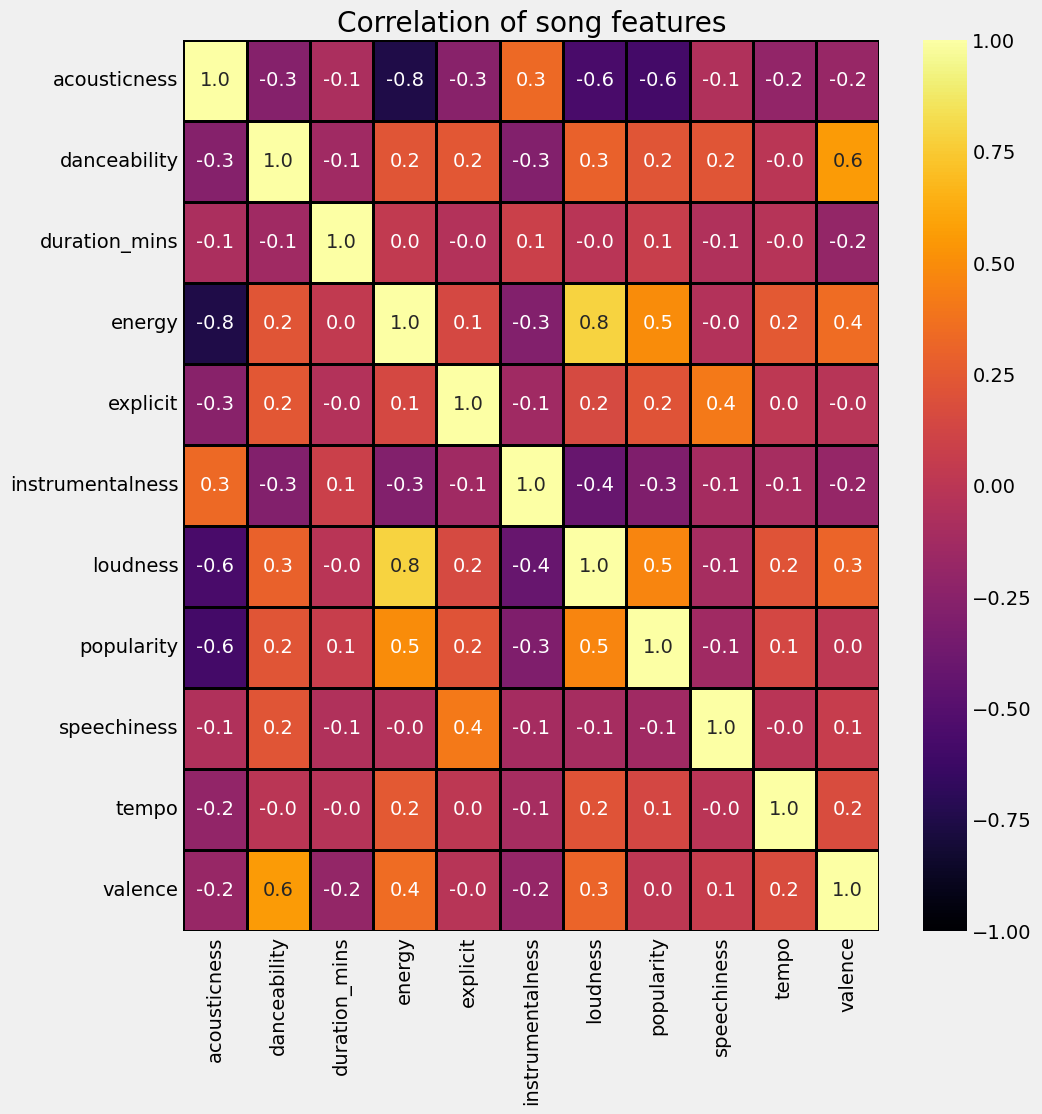

In [190]:
plt.figure(figsize=(10,11))
#Using a chaining method as described by  Matt Harrison. Wrap the second line in brackets so that we are able to break the statement into multi-lines
(sns.heatmap(df.corr()
            .drop(['key','mode','liveness','duration_ms'],axis=0)
            .drop(['key','mode','liveness','duration_ms'],axis=1),annot=True,fmt=".1f",vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
            .set(title='Correlation of song features'))
plt.plot()

#### Regression

[]

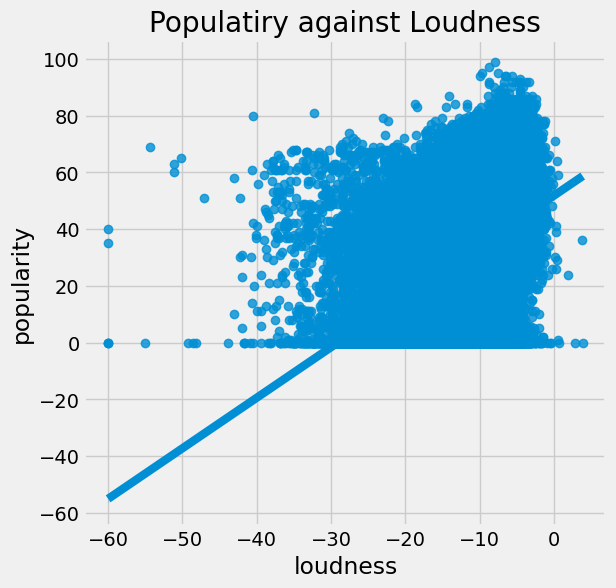

In [191]:
plt.figure(figsize=(6,6))
sns.regplot(data=sample_df, y='popularity', x='loudness').set(title='Populatiry against Loudness')
plt.plot()

Reducing the sample size from 40% to 1% to show the line, otherwise the scatterplot is too dense to see the regression line

In [192]:
sample_df=df.sample(int(.01*len(df)))

[]

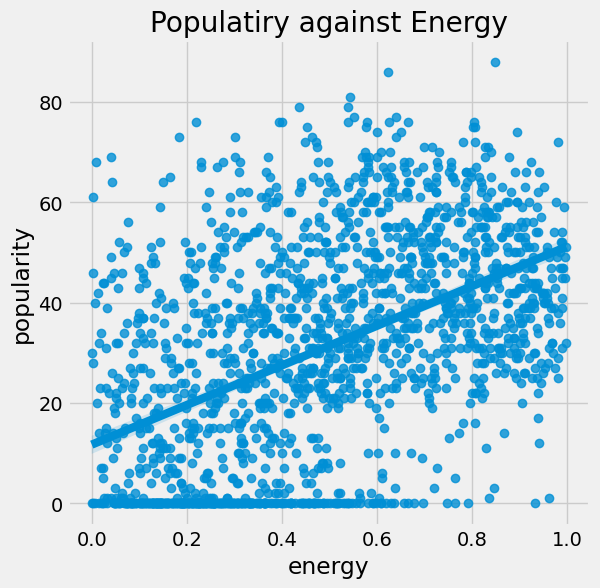

In [193]:
plt.figure(figsize=(6,6))
sns.regplot(data=sample_df, y='popularity', x='energy').set(title='Populatiry against Energy')
plt.plot()

#### Frequency

Note below the release_date field is no longer idsplayed because this field is now an index

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169909 entries, 1949-01-01 to 2013-06-05
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acousticness      169909 non-null  float64       
 1   artists           169909 non-null  object        
 2   danceability      169909 non-null  float64       
 3   duration_ms       169909 non-null  int64         
 4   duration_mins     169909 non-null  float64       
 5   energy            169909 non-null  float64       
 6   explicit          169909 non-null  int64         
 7   id                169909 non-null  object        
 8   instrumentalness  169909 non-null  float64       
 9   key               169909 non-null  int64         
 10  liveness          169909 non-null  float64       
 11  loudness          169909 non-null  float64       
 12  mode              169909 non-null  int64         
 13  name              169909 non-null  object  

Retrieve the values of release_date this way because it is now an index

In [195]:
df['dates'] = df.index.get_level_values('release_date')

In [196]:
year=df['dates'].dt.year #Get the year

In [197]:
df.groupby(year)['popularity'].count() #Get a frequency table of number of songs per year

dates
1921     128
1922      72
1923     169
1924     237
1925     263
        ... 
2016    1969
2017    2000
2018    2000
2019    2000
2020    1756
Name: popularity, Length: 100, dtype: int64

It would appear that the data contains a maximum of 2000 songs per year. Does Spotify hold only 2000 songs per year or is it the nature of the data that was shared by Spotify?

<Figure size 1000x1000 with 0 Axes>

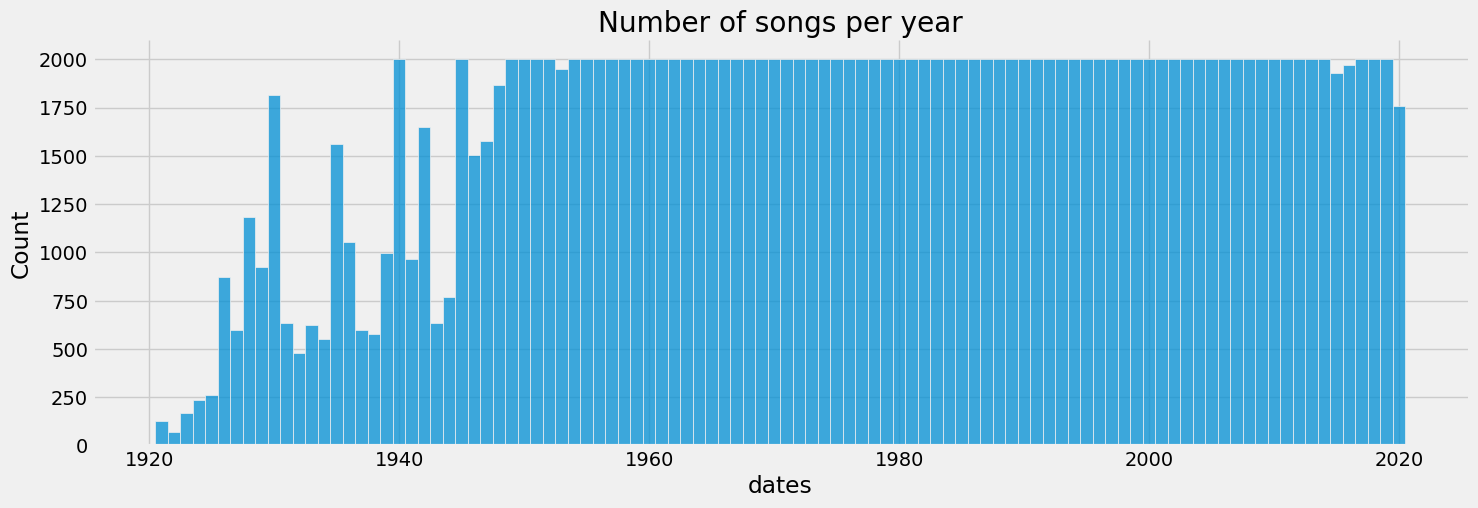

In [198]:
plt.figure(figsize=(10,10))
sns.displot(year,discrete=True, aspect=3 ,height=5, kind='hist').set(title='Number of songs per year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, '1921'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  Text(19, 0, '1940'),
  Text(20, 0, '1941'),
  Text(21, 0, '1942'),
  Text(22, 0, '1943'),
  Text(23, 0, '1944'),
  Text(2

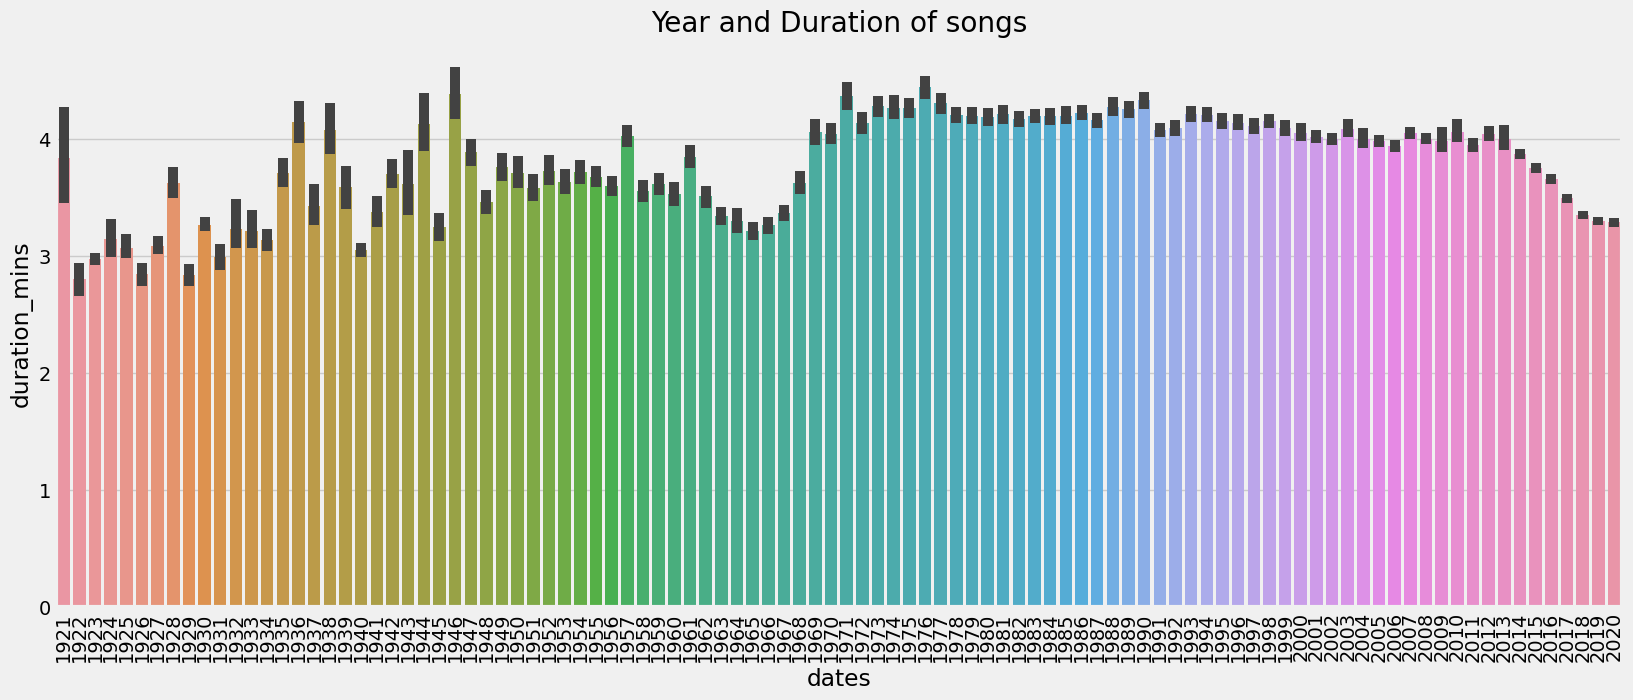

In [199]:
duration = df['duration_mins']
plt.subplots(figsize= (18,7))
sns.barplot(x=year, y=duration).set(title="Year and Duration of songs")
plt.xticks(rotation=90)


Same but as a line plot

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

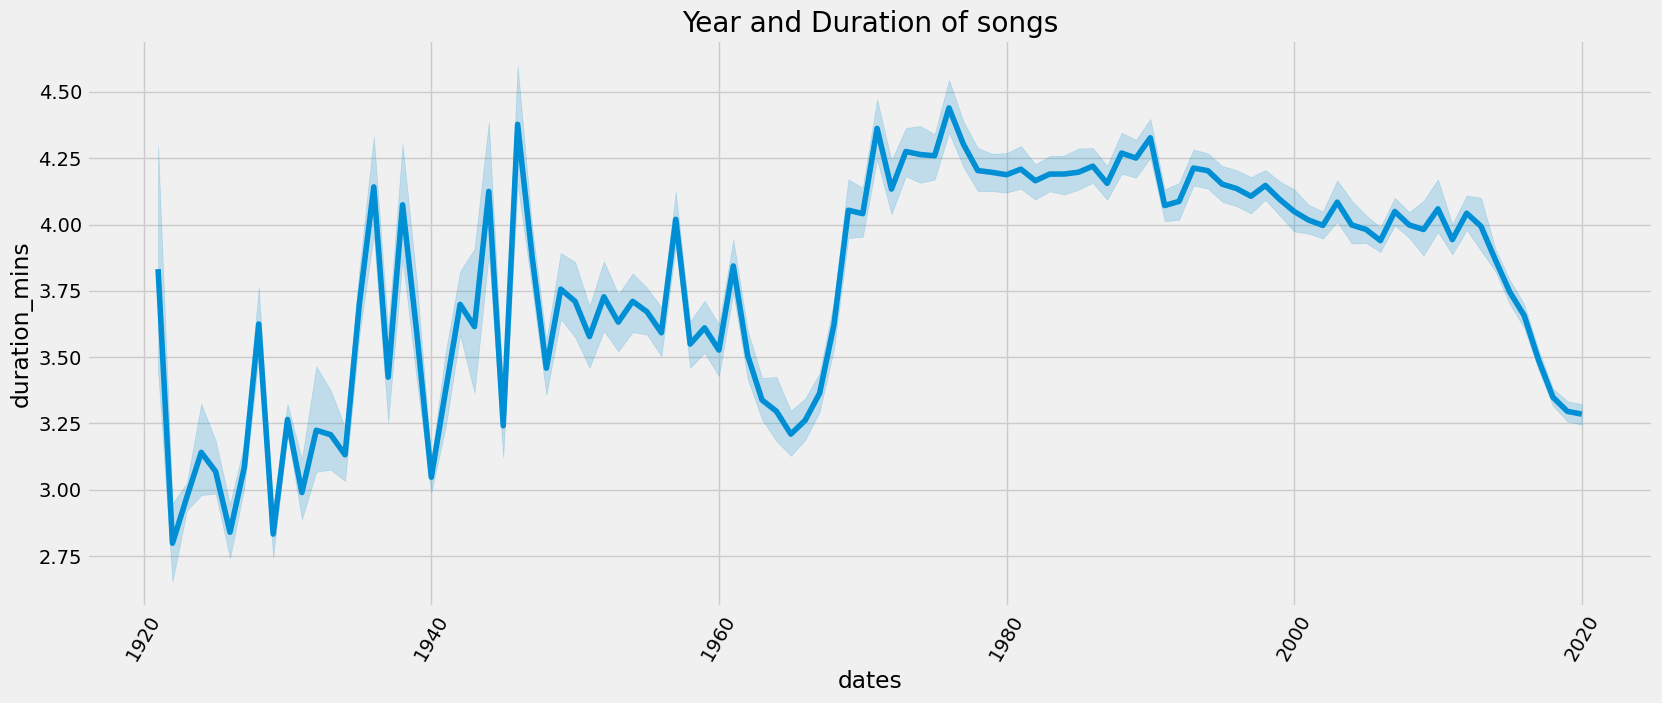

In [200]:
plt.subplots(figsize= (18,7))
sns.lineplot(x=year, y=duration).set(title="Year and Duration of songs")
plt.xticks(rotation=60)

I can do the following because the release_date column has been indexed

In [201]:
df.loc['2019':]

C:\Users\uzx2\AppData\Local\Temp\ipykernel_4400\764220583.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc['2019':]


,acousticness,artists,danceability,duration_ms,duration_mins,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,dates
release_date,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.615000,['Ra1n3cko'],0.831,32679,0.544650,0.6750,0,1DhLaVjfnFL9okAaOp2gUk,0.000066,10,0.1090,-14.853,0,Introduction,59,0.2370,99.907,0.6650,2020-01-01,2020-01-30
2020-04-17,0.993000,['Peter Ehrlichmann'],0.492,57718,0.961967,0.0465,0,4E0b1oXvrPoxHc9Mh3bYzZ,0.961000,2,0.1180,-25.636,1,Eeny Meeny Miny Moe,66,0.0424,64.271,0.5710,2020-01-01,2020-04-17
2020-04-20,0.863000,"['Joedi, the Artist']",0.865,60092,1.001533,0.3150,0,3YtpXXn1TTfSug0rEx3CCg,0.042600,2,0.2490,-11.315,1,On My Way,60,0.0401,109.988,0.9300,2020-01-01,2020-04-20
2020-05-29,0.012600,['Lady Gaga'],0.231,60400,1.006667,0.4570,0,3CGZ7wfk4skmuyQgua1C1K,0.875000,6,0.3270,-10.773,0,Chromatica I,78,0.0318,65.827,0.0588,2020-01-01,2020-05-29
2020-06-02,0.044900,['$IMEON'],0.811,62298,1.038300,0.5210,1,0y0XIWLSED0pGkpQS1SpSj,0.000004,9,0.1450,-9.279,1,My Gal,65,0.2000,88.026,0.4180,2020-01-01,2020-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,0.912000,['Lana Del Rey'],0.404,577199,9.619983,0.2980,1,3hwQhakFwm9soLEBnSDH17,0.228000,9,0.0996,-12.986,0,Venice Bitch,69,0.0304,78.815,0.3150,2019-01-01,2019-08-30
2019-08-30,0.000824,['TOOL'],0.313,620101,10.335017,0.5840,0,39zWYYZStDgWi32sOU9AX4,0.520000,7,0.0529,-10.091,1,Fear Inoculum,65,0.0415,87.894,0.1590,2019-01-01,2019-08-30
2019-05-20,0.085000,['Lil Darkie'],0.457,632625,10.543750,0.9650,1,68Y3zzmt2XxzheQVGbbJt4,0.000000,1,0.6970,0.457,1,GENOCIDE,64,0.4860,170.122,0.6040,2019-01-01,2019-05-20


#### Calculate sum, mean , median and plot graphs

As a trial calculate sum, mean and median for some of the features

In [202]:
pd.DataFrame(df.groupby(['year'], as_index=False)[['popularity','loudness','energy']].agg(['sum','mean','median']))

popularity                     loudness                      \
                  sum       mean median        sum       mean   median   
year                                                                     
1921-01-01         45   0.351562    0.0  -2188.216 -17.095437 -16.2705   
1922-01-01         10   0.138889    0.0  -1380.957 -19.179958 -18.6210   
1923-01-01        968   5.727811    4.0  -2429.186 -14.373882 -13.9930   
1924-01-01        143   0.603376    0.0  -3365.946 -14.202304 -13.8770   
1925-01-01        712   2.707224    0.0  -3817.894 -14.516707 -13.5470   
...               ...        ...    ...        ...        ...      ...   
2016-01-01     120840  61.371254   61.0 -15653.378  -7.949913  -6.6510   
2017-01-01     129723  64.861500   64.0 -16845.395  -8.422697  -6.8545   
2018-01-01     134552  67.276000   66.0 -14507.332  -7.253666  -6.3915   
2019-01-01     139311  69.655500   68.0 -16083.476  -8.041738  -6.3650   
2020-01-01     110823  63.111048   68.0 -12650.266  -7.204024  -6.3405   

                 energy                    
                    sum      mean  median  
year                                       
1921-01-01    30.308300  0.236784  0.2110  
1922-01-01    17.065890  0.237026  0.2010  
1923-01-01    41.732200  0.246936  0.2470  
1924-01-01    82.246800  0.347033  0.3230  
1925-01-01    69.530000  0.264373  0.2410  
...                 ...       ...     ...  
2016-01-01  1167.375121  0.592877  0.6170  
2017-01-01  1173.477174  0.586739  0.6070  
2018-01-01  1181.182340  0.590591  0.6025  
2019-01-01  1157.592226  0.578796  0.6180  
2020-01-01  1074.521320  0.611914  0.6255  

[100 rows x 9 columns]

Calculate the mean for the features to be plotted on a graph

In [203]:
new_df = pd.DataFrame(df.groupby(['year'], as_index=True)[['popularity','acousticness', 'danceability','duration_mins', 'loudness', 'energy', 'valence']]
                                                            .agg('mean'))

In [204]:
new_df

,popularity,acousticness,danceability,duration_mins,loudness,energy,valence
year,,,,,,,
1921-01-01,0.351562,0.895823,0.425661,3.831865,-17.095437,0.236784,0.425495
1922-01-01,0.138889,0.939236,0.480000,2.798409,-19.179958,0.237026,0.534056
1923-01-01,5.727811,0.976329,0.568462,2.972605,-14.373882,0.246936,0.624788
1924-01-01,0.603376,0.935575,0.548654,3.141027,-14.202304,0.347033,0.668574
1925-01-01,2.707224,0.965422,0.571890,3.068845,-14.516707,0.264373,0.616430
...,...,...,...,...,...,...,...
2016-01-01,61.371254,0.280290,0.599976,3.656679,-7.949913,0.592877,0.430769
2017-01-01,64.861500,0.289916,0.612286,3.489060,-8.422697,0.586739,0.414465
2018-01-01,67.276000,0.271941,0.664930,3.348652,-7.253666,0.590591,0.447141


Create array of data to be passed into a for loop to plot the relevant graphs

In [205]:
features = ['popularity','acousticness', 'danceability','duration_mins', 'loudness', 'energy', 'valence']
title_display=['popularity by year','acousticness by year', 'danceability by year','duration_mins by year', 'loudness by year', 'energy by year', 'valence by year']

Create a list/array of tuples from the above arrays

In [206]:
list_of_tuples = list(zip(features, title_display))

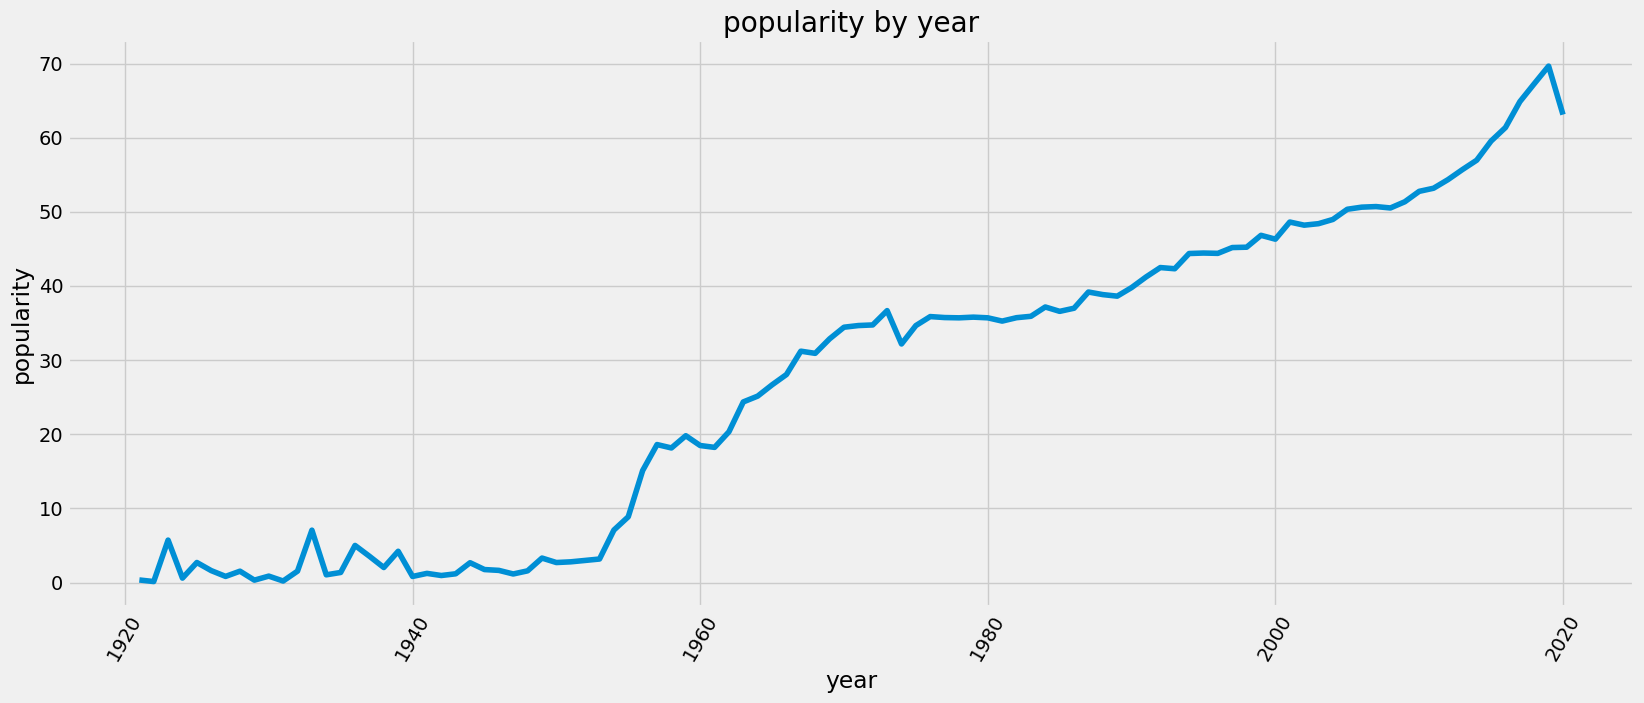

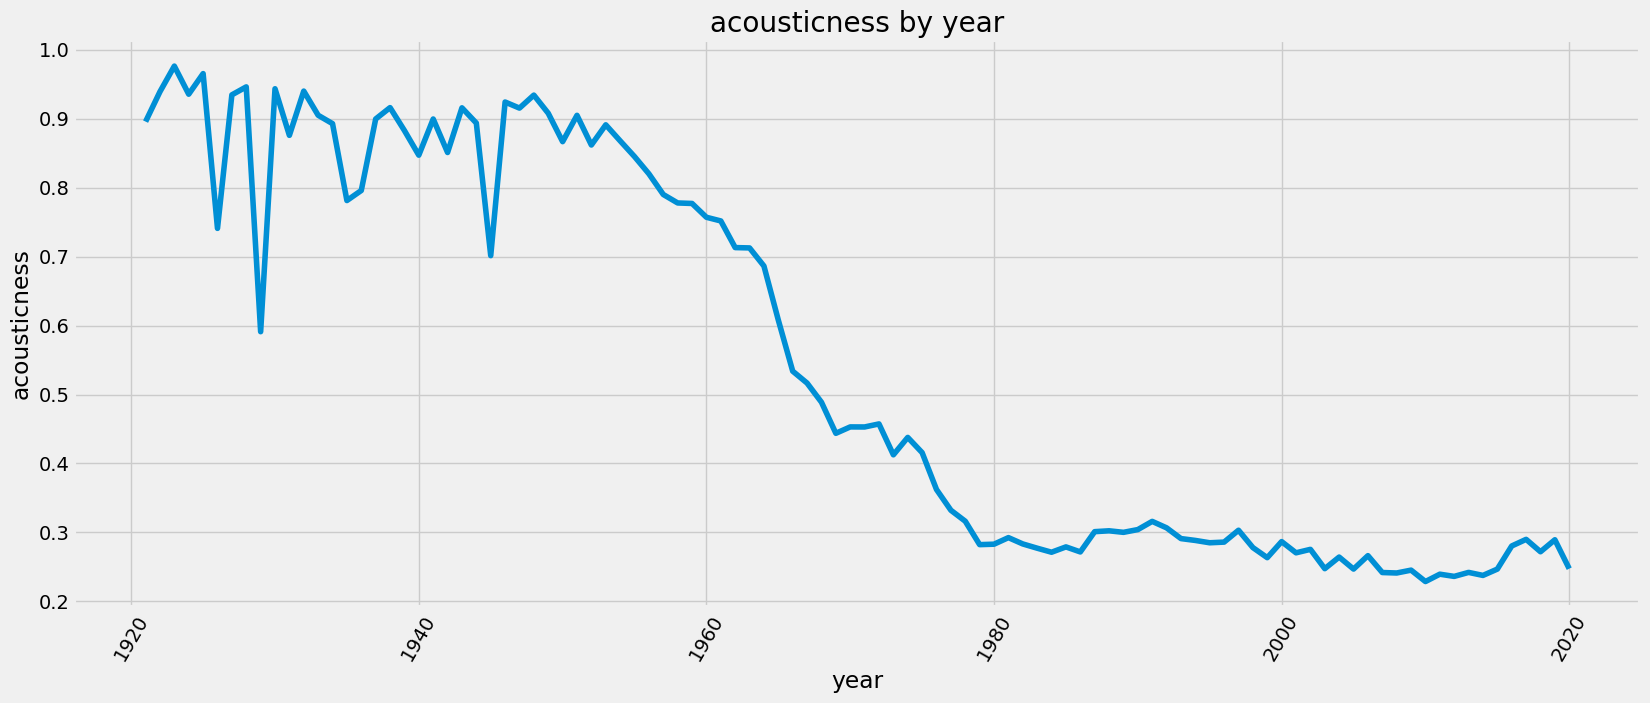

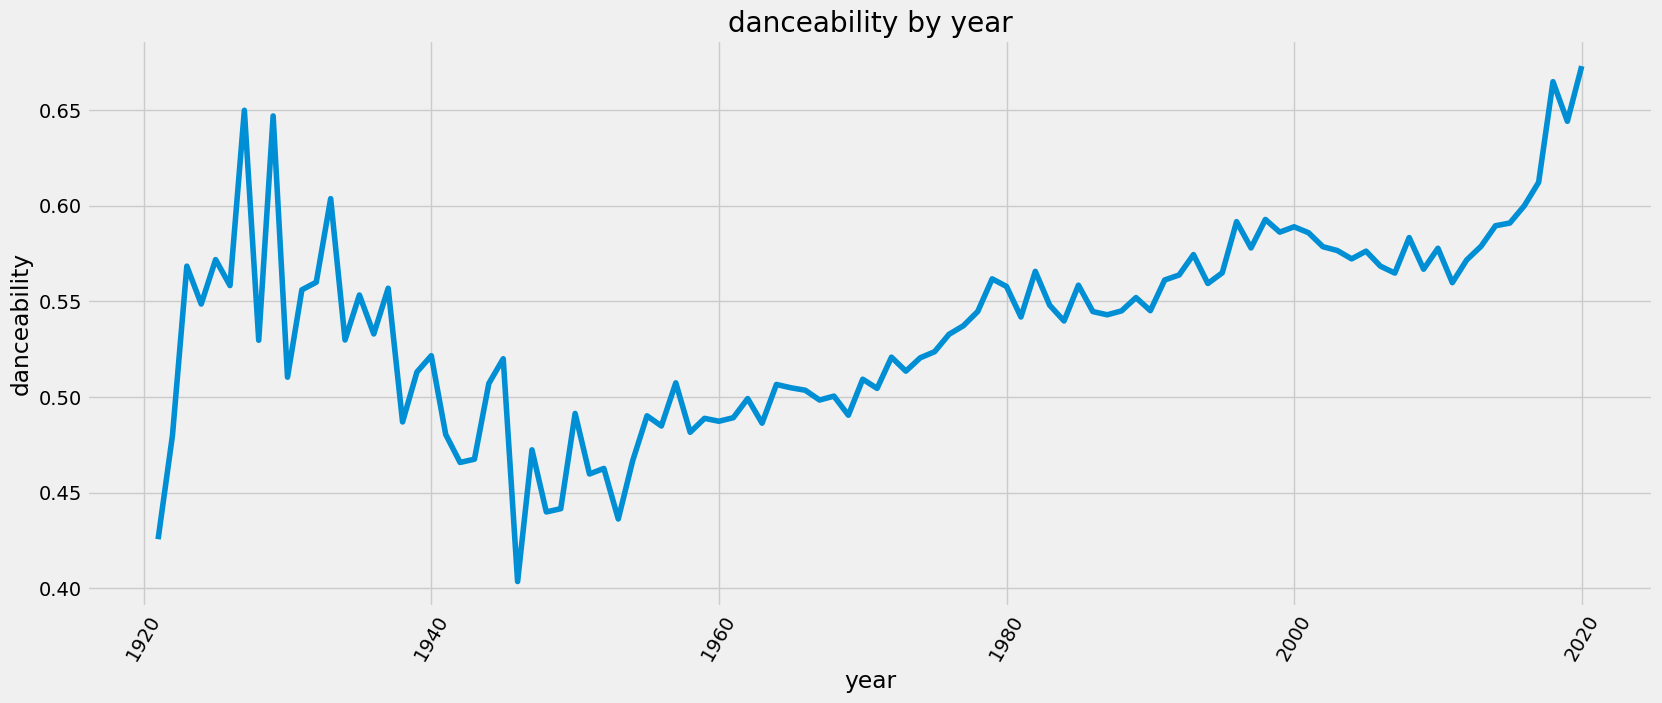

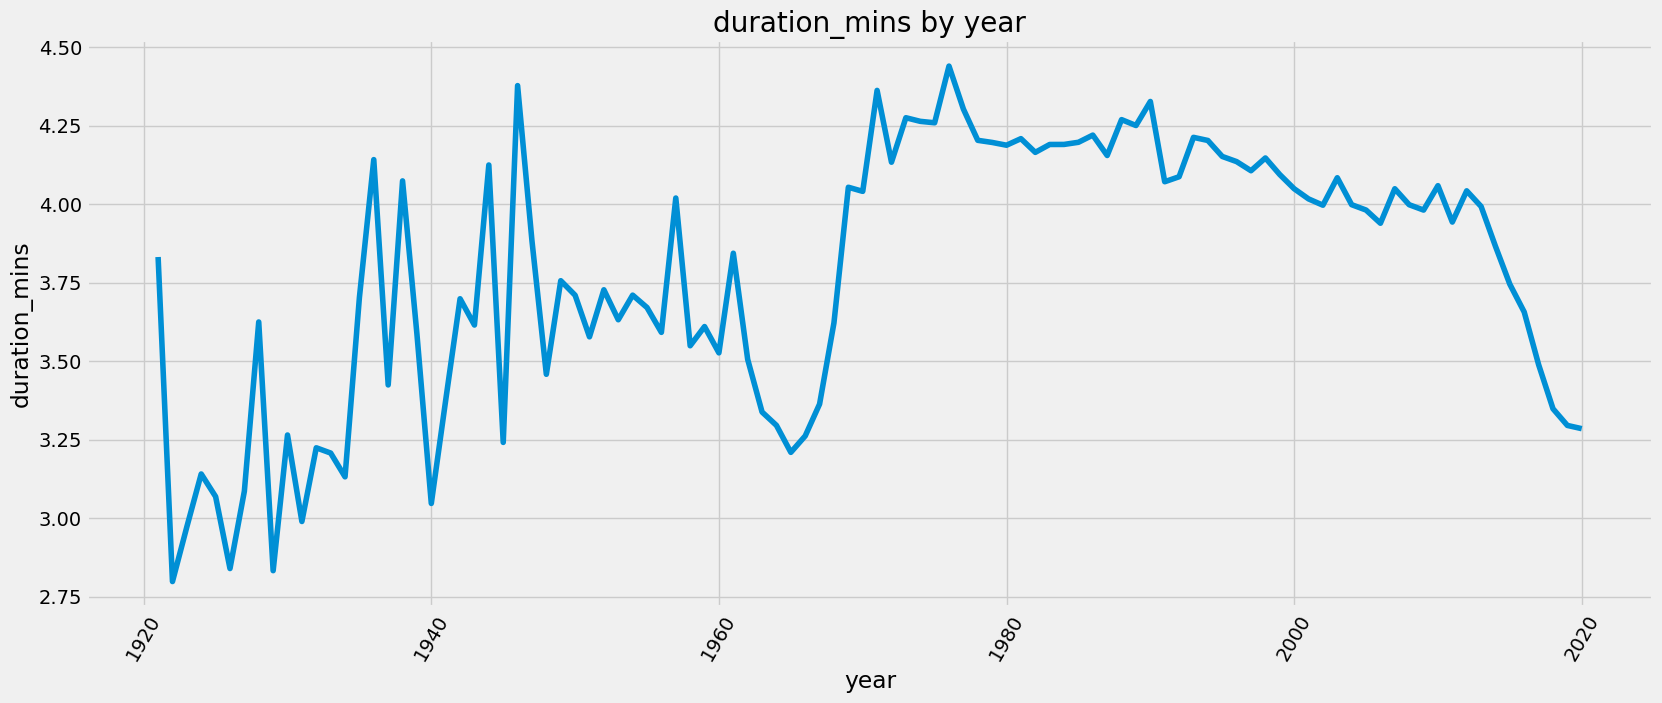

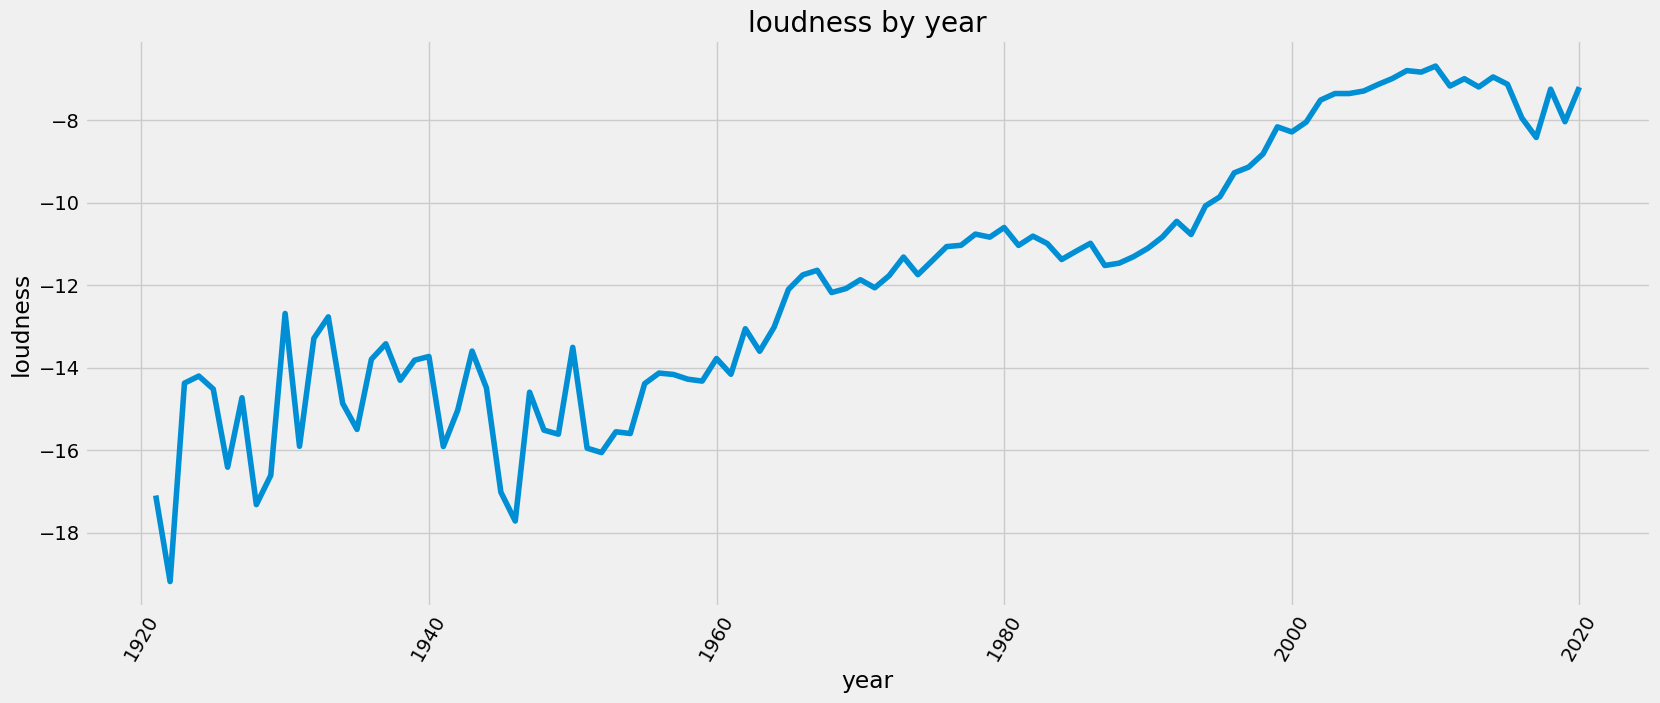

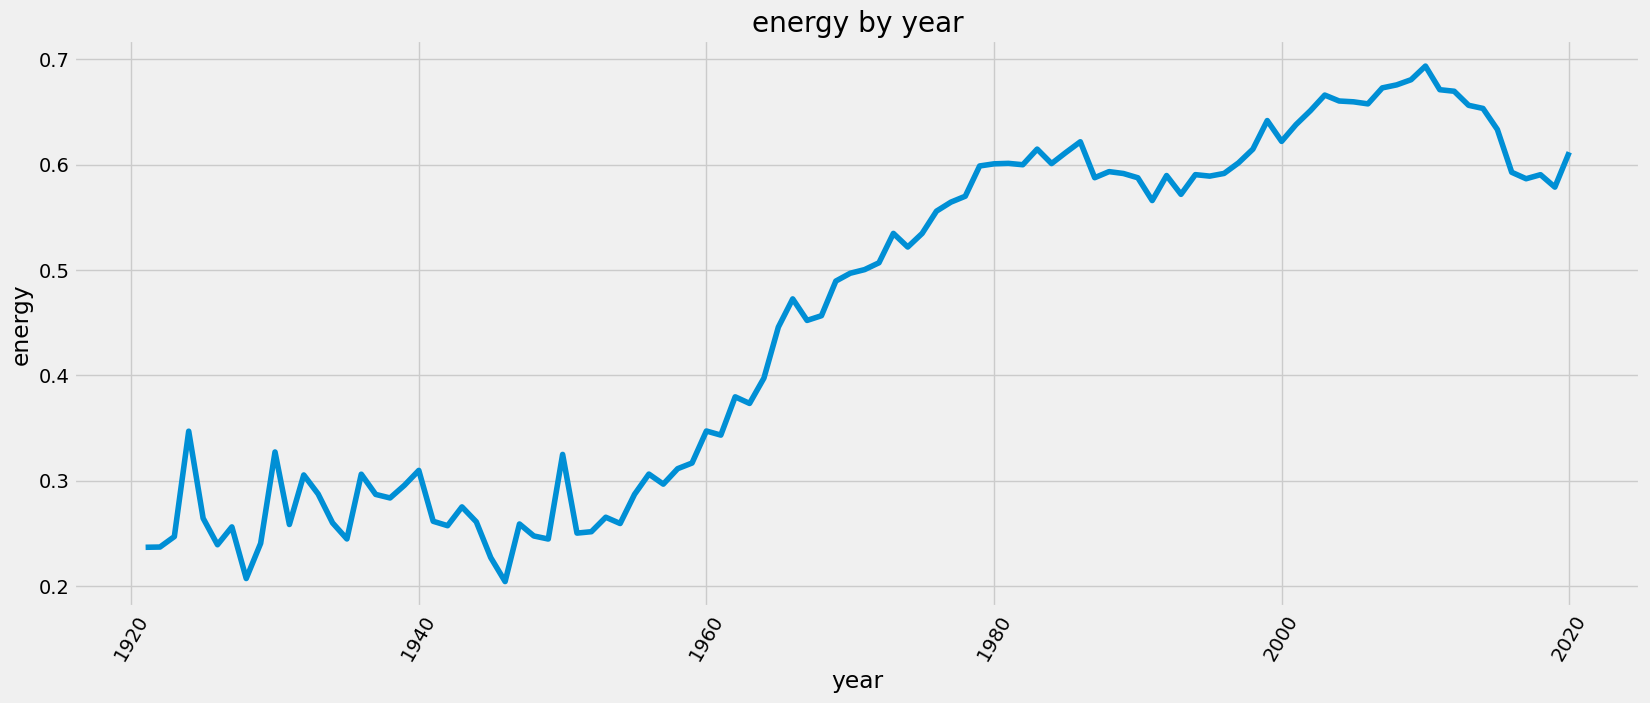

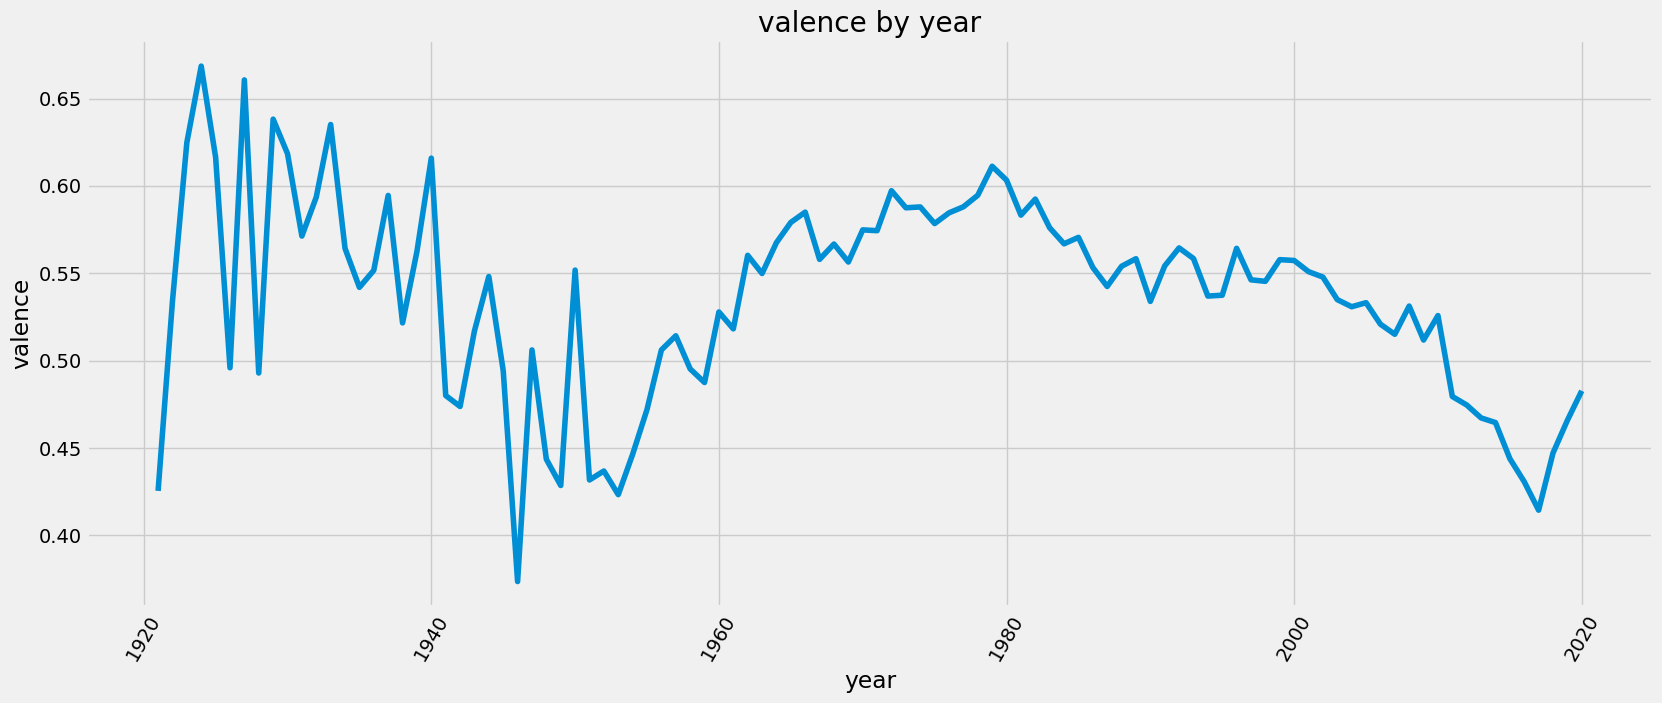

In [207]:
for afeature, atitle in list_of_tuples:
    y_axis = new_df[afeature]                            
    plt.subplots(figsize= (18,7))
    sns.lineplot(x='year', y=afeature, errorbar=None, data=new_df).set(title=atitle)        
    plt.xticks(rotation=60)